Model Training 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings 

Importing CSV data as Pandas Data Frame 

In [7]:
df=pd.read_csv('data/stud.csv')

In [8]:
#show top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables 

In [9]:
X=df.drop(columns=['math_score'],axis=1)

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
print(f'Categories in "gender" variable: ',end=" " )
print(df['gender'].unique())

print(f'Categories in "race_ethnicity" variable: ',end=" ")
print(df['race_ethnicity'].unique())

print(f'Categories in "parental_level_of_education" variable: ',end=" " )
print(df['parental_level_of_education'].unique())

print(f'Categories in "lunch" variable: ',end=" " )
print(df['lunch'].unique())

print(f'Categories in "test_preparation_course" variable: ',end=" " )
print(df['test_preparation_course'].unique())






Categories in "gender" variable:  ['female' 'male']
Categories in "race_ethnicity" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental_level_of_education" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable:  ['standard' 'free/reduced']
Categories in "test_preparation_course" variable:  ['none' 'completed']


In [12]:
y=df['math_score']

In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [14]:
#create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [15]:
X=preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [18]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creating an evaluate function to give all metrics after model training 

In [19]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae,rmse,r2_square

In [35]:
models={
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluate model 
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print(f"Root Mean Squared Error: {model_train_rmse}")
    print(f"Mean Absolute Error: {model_train_mae}")
    print(f"R2 Score: {model_train_r2}")
    
    
    print('-'*10)
    
    print('Model performance for testing set')
    print(f'Root Mean Squared Error{model_test_rmse}')
    print(f'Mean Absolute Error: {model_test_mae}')
    print(f'R2 Score: {model_test_r2}')
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    
    

Linear Regression
Model performance for training set
Root Mean Squared Error: 5.32433097827426
Mean Absolute Error: 4.26708984375
R2 Score: 0.8742567465397689
----------
Model performance for testing set
Root Mean Squared Error5.3959872842671395
Mean Absolute Error: 4.2158203125
R2 Score: 0.8803449074540941


Lasso
Model performance for training set
Root Mean Squared Error: 6.593815587795566
Mean Absolute Error: 5.206302661246526
R2 Score: 0.8071462015863456
----------
Model performance for testing set
Root Mean Squared Error6.519694535667419
Mean Absolute Error: 5.157881810347763
R2 Score: 0.8253197323627853


Ridge
Model performance for training set
Root Mean Squared Error: 5.323324922741654
Mean Absolute Error: 4.264987823725981
R2 Score: 0.8743042615212909
----------
Model performance for testing set
Root Mean Squared Error5.39038701693564
Mean Absolute Error: 4.211100688014261
R2 Score: 0.8805931485028737


K-Neighbors Regressor
Model performance for training set
Root Mean Squared

In [38]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,RandomForestRegressor,0.855022
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851287
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.754909


Linear Regression

In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train , y_train)

y_pred = lin_model.predict(X_test)

score=r2_score(y_test,y_pred)*100 
print(f'Accuracy of the model is {score:.2f}')

Accuracy of the model is 88.03


Plot y_pred and y_test 

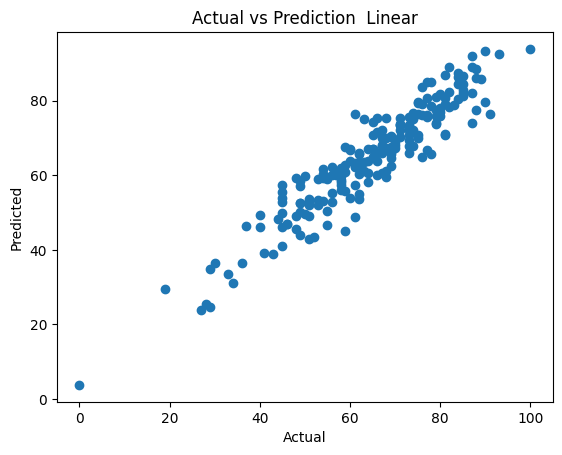

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Prediction  Linear")
plt.show()

In [50]:
r_model=Ridge()
r_model=r_model.fit(X_train,y_train)

y_pred = r_model.predict(X_test)
score=r2_score(y_test,y_pred)*100

print(f'Accuracy of the model is {score:.2f}')

Accuracy of the model is 88.06


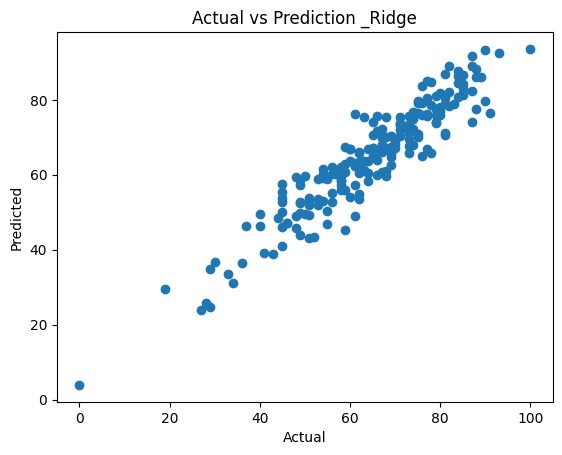

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Prediction _Ridge")
plt.show()

<Axes: xlabel='math_score'>

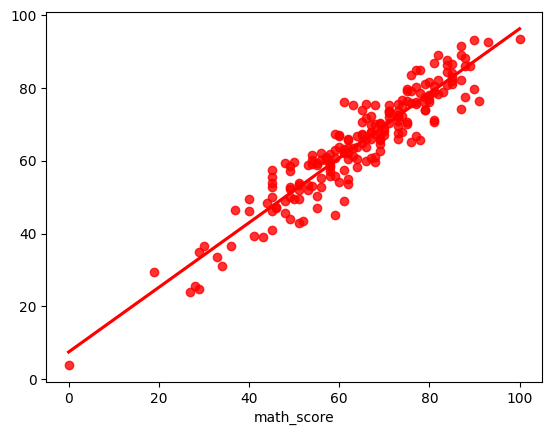

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

Difference betweeen actual and Predicted Values 

In [55]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
